In [ ]:
Bagging Classifier Implementation for Research

{5: [0.6639428571428572, 0.6646428331287688, 0.6648285714285715, 0.6638285714285714, 0.6643571428571429], 10: [0.6720142857142857, 0.6711000235388882, 0.6701428571428572, 0.6703142857142856, 0.669157142857143], 15: [0.6753857142857143, 0.6751000519074625, 0.6746571428571428, 0.6743285714285715, 0.6744142857142857], 20: [0.6766714285714286, 0.6775857631330107, 0.6768142857142857, 0.6759571428571428, 0.6757142857142856]}


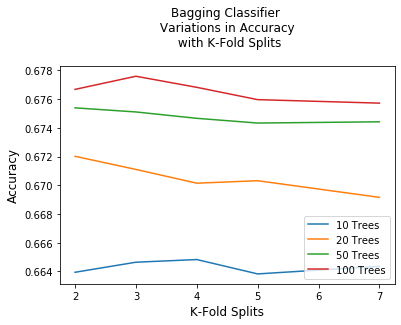


 {5: [0.6639428571428572, 0.6646428331287688, 0.6648285714285715, 0.6638285714285714, 0.6643571428571429], 10: [0.6720142857142857, 0.6711000235388882, 0.6701428571428572, 0.6703142857142856, 0.669157142857143], 15: [0.6753857142857143, 0.6751000519074625, 0.6746571428571428, 0.6743285714285715, 0.6744142857142857], 20: [0.6766714285714286, 0.6775857631330107, 0.6768142857142857, 0.6759571428571428, 0.6757142857142856]}
Number of trees 5 ----> Accuracy Score = 0.6643199951971823
Number of trees 10 ----> Accuracy Score = 0.670545718993492
Number of trees 15 ----> Accuracy Score = 0.6747771532386354
Number of trees 20 ----> Accuracy Score = 0.6765485811980307


In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import numpy as np

class Bagging_Classifier():
    def __init__(self):
        self.split = [2,3,4,5,7]
        self.trees = [5,10,15,20]
    
    def dataset_split(self):
        df = pd.read_csv("cardio_preprocessed.csv")  
        X = df.drop('cardio',axis=1)
        y = df.cardio
        return X,y

    def model_creation(self):
        acc_score = {}       
        for i in self.trees:    
            acc = []
            for j in self.split:
                kfold = model_selection.KFold(n_splits=j)
                model = BaggingClassifier(n_estimators=i, random_state=0)
                results = model_selection.cross_val_score(model, X, y, cv=kfold)
                accuracy_score = results.mean()
                acc.append(accuracy_score)
                acc_score[i]=acc
        print(acc_score)

        return acc_score
    
    def graph(self, acc_score):
        for i in acc_score:
            plt.plot(self.split, acc_score[i])
        plt.title("Bagging Classifier \n Variations in Accuracy \n with K-Fold Splits", pad=20)
        plt.ylabel("Accuracy", fontsize = "large")
        plt.xlabel('K-Fold Splits', fontsize = "large")
        plt.legend(["10 Trees", "20 Trees", "50 Trees", "100 Trees"], loc='lower right')
        plt.show()
        



bag_cla = Bagging_Classifier()
X,y = bag_cla.dataset_split()
acc_score = bag_cla.model_creation()
bag_cla.graph(acc_score)

print("\n",acc_score)

for x,y in acc_score.items():
    print("Number of trees {0} ----> Accuracy Score = {1}". format (x, np.mean(acc_score[x])) )
